# Project 01: Build a CNN model with Cifar100

Data: cifar-100
Features: contains 60,000 (32x32) pixel RGB images across 100 non-overlapping classes

So 1 class will have 600 samples

The dataset is splitted into 50,000 for training set and 10,000 for test set

In [20]:
#Model import
from tensorflow import keras
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Flatten, Conv2D, MaxPooling2D, Dense
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy
import matplotlib.pyplot as plt

In [21]:
#Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 100
optimizer = Adam()
validation_split = 0.2

In [34]:
#load data
(input_train, target_train), (input_test, target_test) = cifar100.load_data()

In [35]:
#determine the shape of the data
input_shape = (img_width, img_height, img_num_channels)

In [36]:
#Convert to float 32
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

#Normalize the data
input_train = input_train / 255
input_test = input_test / 255


In [37]:
# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) #convert to 1D
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))


In [42]:
#model compile
model.compile(loss=loss_function,
             optimizer=optimizer,
              metrics=['accuracy'])

#fit to the training data
history = model.fit(input_train, target_train,
                   batch_size=batch_size,
                   epochs=no_epochs,
                   validation_split=validation_split)

Epoch 1/100
800/800 [==============================] - 48s 59ms/step - loss: 4.1184 - accuracy: 0.0626 - val_loss: 3.7327 - val_accuracy: 0.1228
Epoch 2/100
800/800 [==============================] - 44s 55ms/step - loss: 3.5076 - accuracy: 0.1583 - val_loss: 3.4448 - val_accuracy: 0.1758
Epoch 3/100
800/800 [==============================] - 41s 52ms/step - loss: 3.1772 - accuracy: 0.2199 - val_loss: 3.1251 - val_accuracy: 0.2333
Epoch 4/100
800/800 [==============================] - 41s 52ms/step - loss: 2.9403 - accuracy: 0.2636 - val_loss: 2.9892 - val_accuracy: 0.2583
Epoch 5/100
800/800 [==============================] - 44s 55ms/step - loss: 2.7417 - accuracy: 0.3088 - val_loss: 2.8664 - val_accuracy: 0.2909
Epoch 6/100
800/800 [==============================] - 45s 57ms/step - loss: 2.5837 - accuracy: 0.3392 - val_loss: 2.7672 - val_accuracy: 0.3051
Epoch 7/100
800/800 [==============================] - 43s 54ms/step - loss: 2.4385 - accuracy: 0.3658 - val_loss: 2.6692 - val_ac

800/800 [==============================] - 43s 54ms/step - loss: 0.3606 - accuracy: 0.8839 - val_loss: 8.2833 - val_accuracy: 0.3042
Epoch 58/100
800/800 [==============================] - 42s 52ms/step - loss: 0.3750 - accuracy: 0.8791 - val_loss: 8.0900 - val_accuracy: 0.3014
Epoch 59/100
800/800 [==============================] - 41s 52ms/step - loss: 0.3739 - accuracy: 0.8786 - val_loss: 8.2334 - val_accuracy: 0.3050
Epoch 60/100
800/800 [==============================] - 42s 52ms/step - loss: 0.3403 - accuracy: 0.8905 - val_loss: 8.1739 - val_accuracy: 0.3071
Epoch 61/100
800/800 [==============================] - 42s 52ms/step - loss: 0.3514 - accuracy: 0.8884 - val_loss: 8.5190 - val_accuracy: 0.3060
Epoch 62/100
800/800 [==============================] - 42s 52ms/step - loss: 0.3623 - accuracy: 0.8868 - val_loss: 8.3839 - val_accuracy: 0.3024
Epoch 63/100
800/800 [==============================] - 41s 51ms/step - loss: 0.3534 - accuracy: 0.8895 - val_loss: 8.6637 - val_accuracy

In [43]:
# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 11.149250984191895 / Test accuracy: 0.3034000098705292


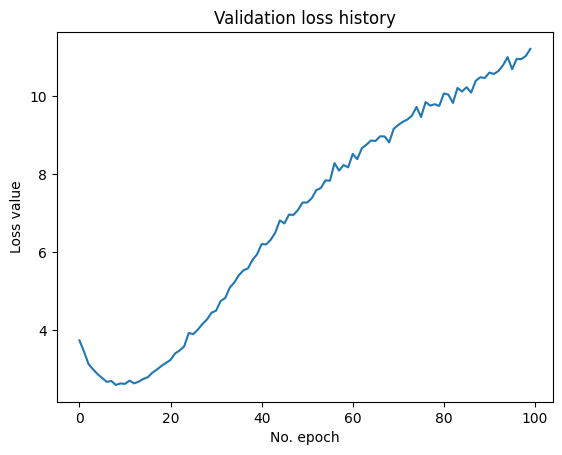

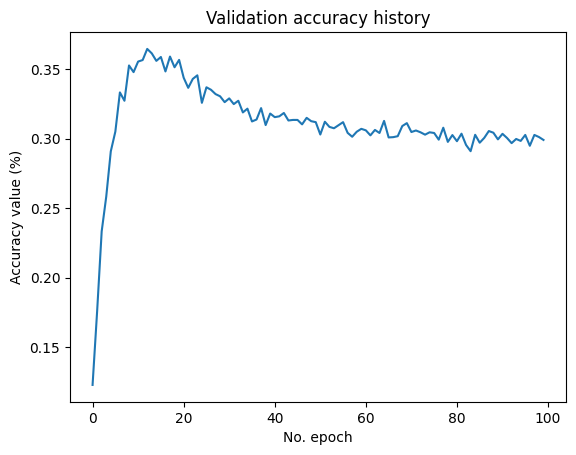

In [44]:
# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()